### A coding scheme for Simon game sequences

#### **Author:** Sol Markman (smarkman@mit.edu)

Assumption: This scheme is hierarchical, so that different chunk types take priority over others. For example, repeats of a single color are chunked first, then repeats of multiple colors, then nested repeats, and then alternations are chunked with the remaining items, etc.
- RRRGRGRG is compressed to [R]^3 [GR]^2 G, size=6
- RRRGRG is compressed to [R]^3 [GRG], size=4

#### Types of chunks/compression and their sizes:

#### 1) Repeats
Size = (size of subsequence) + 1. This assumes that size does not increase with the number of repeats, and 
repeats are only beneficial for size>2.

a) Single color repeats
- RRRR is compressed to [R]^4, size=2

b) Multicolor repeats
- RGRGRG is compressed to [RG]^3, size=3
    
c) Nested repeats
- RRRGGGRRRGGG is compressed to [ [R]^3 [G]^3 ]^2, size=5

#### 2) Alternations
Not yet implemented

#### 3) Cycles
Not yet implemented

#### 4) Exposure compression (within a sequence)
Not yet implemented


In [1]:
# Repeat chunking for hypotheses 1 (single repeats only) and 3 (+ multicolor and nested repeats).
def find_repeats(seq, length): 
    """
    Finds repeats of patterns of a fixed length.
    """
    i = 0
    result = []
    while i < len(seq):
        if i + 2 * length <= len(seq) and seq[i:i+length] == seq[i+length:i+2*length]:
            pattern = seq[i:i+length]
            count = 2
            j = i + 2 * length
            while j + length <= len(seq) and seq[j:j+length] == pattern:
                count += 1
                j += length
            result.append(f'[{pattern}]{count}')
            i = j

        else: # move onto the next character
            result.append(seq[i])
            i += 1

    return ''.join(result)

def repeat_chunking(seq, single_only=False): 
    '''
    Finds repeating patterns within a sequence recursively.
    If single_only, only simple single-character repeats.
    Otherwise, includes multicolor and nested repeats.
    Note: Shorter pattern lengths are chunked first. Once a character is chunked, that chunk cannot be broken.
        E.g. GBGBBB = GBG[B]3, not [GB]2[B]2 because the B's at the end are chunked first.
    '''
    length = 1 # Initialize pattern length
    max_len = 1

    # recursively look for repeating patterns of increasing length
    new_seq = seq
    while length <= max_len:
        new_seq = find_repeats(new_seq, length)
        max_len = 1 if single_only else len(new_seq)//2
        length += 1 # increase length and keep going

    code = ''.join(new_seq)
    code_len = len(code.replace('[', '').replace(']', ''))
    chunkability = 1 - code_len/len(seq)

    return code_len, chunkability, code

In [2]:
# coding scheme 1: chunking simple (single character) repeats only.
def hyp1(seq):
    return repeat_chunking(seq, single_only=True)

# Testing hyp1 code
test_sequences = ['BBBRRRYYYGGG', 'RRRZGZRRR', 'BBBBGRY', 'RRRYGYGYG', 'GBGBB', 
                    'BBBBBBBrrrBBBBBB', 'GGGGGGGG', 'ABCD', 'BGGGR', 'abbabbabba']
answers = [8, 7, 5, 8, 5, 6, 2, 4, 4, 10]

def test_coding_scheme(scheme, sequences, answers):
    for i in range(len(sequences)):
        s_idx = i
        sequence = sequences[s_idx]
        print(sequence, answers[s_idx])
        print(scheme(sequence))
        if scheme(sequence)[0] != answers[s_idx]:
            print('^ERROR')
    

test_coding_scheme(hyp1, test_sequences, answers)

BBBRRRYYYGGG 8
(8, 0.33333333333333337, '[B]3[R]3[Y]3[G]3')
RRRZGZRRR 7
(7, 0.2222222222222222, '[R]3ZGZ[R]3')
BBBBGRY 5
(5, 0.2857142857142857, '[B]4GRY')
RRRYGYGYG 8
(8, 0.11111111111111116, '[R]3YGYGYG')
GBGBB 5
(5, 0.0, 'GBG[B]2')
BBBBBBBrrrBBBBBB 6
(6, 0.625, '[B]7[r]3[B]6')
GGGGGGGG 2
(2, 0.75, '[G]8')
ABCD 4
(4, 0.0, 'ABCD')
BGGGR 4
(4, 0.19999999999999996, 'B[G]3R')
abbabbabba 10
(10, 0.0, 'a[b]2a[b]2a[b]2a')


In [3]:
# coding scheme 3: including complex repeats (multi-item and nesting).
def hyp3(seq):
    return repeat_chunking(seq, single_only=False)

# Testing hyp3 code
test_sequences = ['BBBRRRYYYGGG', 'RRRZGZRRR', 'BBBBGRY', 'RRRYGYGYG', 'GBGBB', 
                'BBBBBBBrrrBBBBBB', 'GRGRGRZDZDZDZTTTTTTTGGG', 'ababcdcdababcdcd',
                'abbabbabba', 'abcabcabc', 'abbccccabbccccabbcccc', 'bbbbaaaabbbbaaaa',
                'bbbaaabbbaaa', 'bbaabbaa', 'baba', 'bbaabbaab']
answers = [8, 7, 5, 5, 5, 6, 11, 7, 5, 4, 6, 5, 5, 5, 3, 6]

test_coding_scheme(hyp3, test_sequences, answers)

BBBRRRYYYGGG 8
(8, 0.33333333333333337, '[B]3[R]3[Y]3[G]3')
RRRZGZRRR 7
(7, 0.2222222222222222, '[R]3ZGZ[R]3')
BBBBGRY 5
(5, 0.2857142857142857, '[B]4GRY')
RRRYGYGYG 5
(5, 0.4444444444444444, '[R]3[YG]3')
GBGBB 5
(5, 0.0, 'GBG[B]2')
BBBBBBBrrrBBBBBB 6
(6, 0.625, '[B]7[r]3[B]6')
GRGRGRZDZDZDZTTTTTTTGGG 11
(11, 0.5217391304347826, '[GR]3[ZD]3Z[T]7[G]3')
ababcdcdababcdcd 7
(7, 0.5625, '[[ab]2[cd]2]2')
abbabbabba 5
(5, 0.5, '[a[b]2]3a')
abcabcabc 4
(4, 0.5555555555555556, '[abc]3')
abbccccabbccccabbcccc 6
(6, 0.7142857142857143, '[a[b]2[c]4]3')
bbbbaaaabbbbaaaa 5
(5, 0.6875, '[[b]4[a]4]2')
bbbaaabbbaaa 5
(5, 0.5833333333333333, '[[b]3[a]3]2')
bbaabbaa 5
(5, 0.375, '[[b]2[a]2]2')
baba 3
(3, 0.25, '[ba]2')
bbaabbaab 6
(6, 0.33333333333333337, '[[b]2[a]2]2b')


In [118]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import import_ipynb
import LempelZivScheme

In [84]:
# Methods adapted from LempelZivScheme.ipynb

def parse_simon_game_csv(filepath):
    # Parse the CSV file and convert the color names to single characters
    dataframe = pd.read_csv(filepath)
    dataframe["Event"] = dataframe["Event"].map(
        {"red": "R", "blue": "B", "green": "G", "yellow": "Y", np.nan: "",
         "None": ""}
    )
    # Because there may be multiple gameplays in a single file,
    # we need to split the data frame whenever Score reset to 0.
    # Create a group id that increments each time Score is 0
    dataframe["group_id"] = (dataframe["Score"] == 0).cumsum()
    # Split the data into subdataframes based on group_id
    subdataframes = [group for _, group in dataframe.groupby("group_id")]
    game_results = dict()
    for data in subdataframes:
        # Get the longest chain the player was able to reproduce
        # and the chain they made when the made a mistake.
        best_and_last = data[data.Score >= max(data.Score) - 1]
        # print(best_and_last)
        longest_sequence = "".join(
            best_and_last[
                best_and_last.Score == best_and_last.iloc[0].Score
            ].Event.to_list()
        )
        mistake_sequence = "".join(
            best_and_last[
                best_and_last.Score == best_and_last.iloc[-1].Score
            ].Event.to_list()
        )
        # Discard only length-0 sequences as a result of player inattention.
        if len(longest_sequence) == 0:
            continue
        game_number = data.iloc[0].group_id
        # Dictionary containing the longest sequence and the mistake sequence
        game_sequences = {
            "longest_sequence": longest_sequence,
            "mistake_sequence": mistake_sequence,
        }
        game_results[game_number] = game_sequences
    return game_results


def parse_simons_game_logs(directory):
    session_data = {}
    # Traverse the directory tree
    for root, dirs, files in os.walk(directory):
        # Get all CSV files in the specified directory
        for file in files:
            if file.endswith(".csv"):
                filepath = os.path.join(root, file)
                filename = os.path.basename(filepath)
                game_sequences = parse_simon_game_csv(filepath)
                session_data[filename] = (
                    game_sequences
                )
    return session_data

In [127]:
# Analyze data within one subject

def hyp2(seq):
    """Calculate the Lempel-Ziv complexity of a sequence with a limited set of characters."""
    code_len, patterns = LempelZivScheme.lempel_ziv_complexity(seq, return_patterns=True)
    chunkability = 1 - code_len/len(seq)
    return code_len, chunkability, patterns

def get_chunkabilities_from_logs(data_path):
    session_data = parse_simons_game_logs(data_path)

    N_games = 0
    scores = []
    sequences = []

    for i, key in enumerate(session_data.keys()):
        N_games += len(session_data[key])
        for game in session_data[key].values():
            sequences.append(game['longest_sequence'])
            scores.append(len(game['longest_sequence']))

    print('Games: ', N_games)
    print('Scores: ', scores)
    print('Sequences: ', sequences)

    # Compute chunkabilities for each sequence
    chunk1 = []
    chunk2 = []
    chunk3 = []
    for seq in sequences:
        chunk1.append(hyp1(seq)[1])
        chunk2.append(hyp2(seq)[1])
        chunk3.append(hyp3(seq)[1])
    
    return scores, sequences, chunk1, chunk2, chunk3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Games:  12
Scores:  [12, 21, 25, 25, 35, 15, 9, 11, 28, 13, 1, 8]
Sequences:  ['GRRBBYYBBYBY', 'YGGYGGGGYRRGBRBYBBRBG', 'BGGBGGGBYYBGYBBBBBGGYBBYB', 'GRBYRGRRRYBGRGYGYRRYGBBYB', 'YBYRGBYBRRBRGYBYBYGRRBBBYGYRYYGYBRR', 'BBYYYYYRYRRGRGY', 'GGYRBYRGR', 'RRRYBYBYYYY', 'GGYGBRBYBGBYYGBBBRYGGRRRYRBR', 'YYGBYYYYYGYBR', 'G', 'GBBRGGGY']
Hyp:   slope,   intercept,   r-value,   p-value,   std_err
Hyp1:  -6.969494491516175 17.62740096207988 -0.06756780727600474 0.8347278818271757 32.5437667125222
Hyp3:  -3.0462568153521445 17.26780237341341 -0.03370571257429992 0.9171778659068951 28.563811935843056


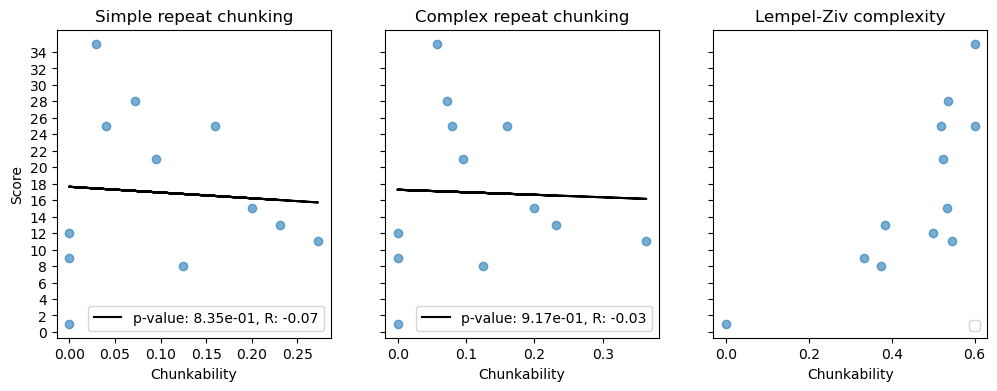

In [141]:
data_path = './Hokyung_logs' # './Sol_logs/Random' # './Quilee_logs' # './Jack_logs' # 
scores, sequences, chunk1, chunk2, chunk3 = get_chunkabilities_from_logs(data_path)

m1, b1, r1, p1, std_err1 = stats.linregress(chunk1, scores)
m3, b3, r3, p3, std_err3 = stats.linregress(chunk3, scores)

print('Hyp:   slope,   intercept,   r-value,   p-value,   std_err')
print('Hyp1: ', m1, b1, r1, p1, std_err1)
print('Hyp3: ', m3, b3, r3, p3, std_err3)

fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=False, sharey=True)
ax[0].scatter(chunk1, scores, alpha=0.6)
ax[1].scatter(chunk3, scores, alpha=0.6)
ax[2].scatter(chunk2, scores, alpha=0.6)
ax[0].set(xlabel='Chunkability', ylabel='Score', title='Simple repeat chunking',
          yticks=np.arange(0, np.max(scores)+1, 2))
ax[1].set(xlabel='Chunkability', title='Complex repeat chunking')
ax[2].set(xlabel='Chunkability', title='Lempel-Ziv complexity')
ax[0].plot(np.array(chunk1), m1*np.array(chunk1) + b1, color='k', zorder=0, 
           label=f'p-value: {p1:.2e}, R: {r1:.2f}')
ax[1].plot(np.array(chunk3), m3*np.array(chunk3) + b3, color='k', zorder=0, 
           label=f'p-value: {p3:.2e}, R: {r3:.2f}')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
ax[2].legend(loc='lower right')

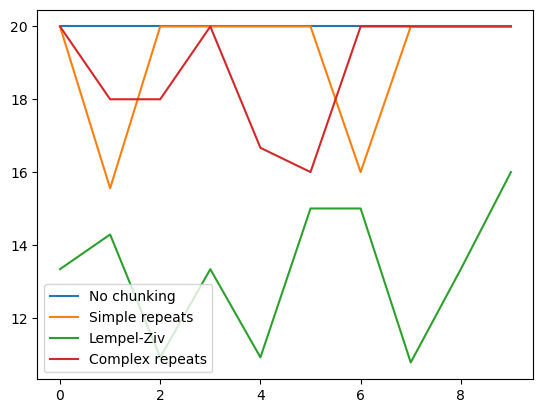

In [132]:
n = 10
np.random.seed(18)
plt.plot(np.arange(n), 20*(1 - np.zeros(n)), label='No chunking')
plt.plot(np.arange(n), 20*(1 - np.random.choice(chunk1, n)), label='Simple repeats')
plt.plot(np.arange(n), 20*(1 - np.random.choice(chunk2, n)), label='Lempel-Ziv')
plt.plot(np.arange(n), 20*(1 - np.random.choice(chunk3, n)), label='Complex repeats')
plt.legend()

